In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


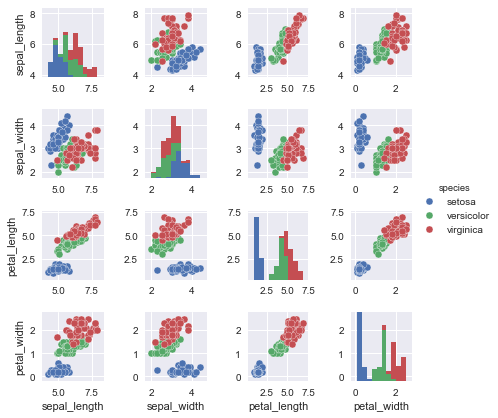

In [3]:
sns.set()
sns.pairplot(iris, hue='species', size=1.5)

In [4]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

In [5]:
X_iris.shape, y_iris.shape

((150, 4), (150,))

#### example:simple linear regression

In [6]:
import numpy as np
import matplotlib.pyplot as plt

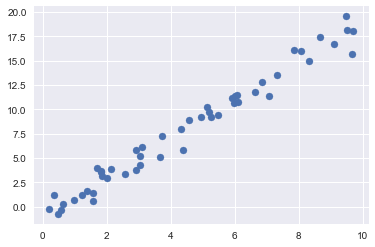

In [7]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x -1 + rng.randn(50)
plt.scatter(x, y)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression(fit_intercept=True)

In [10]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
X = x[:, np.newaxis]

In [12]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
model.coef_ # 斜率

array([1.9776566])

In [14]:
model.intercept_ # 截距

-0.9033107255311146

In [15]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

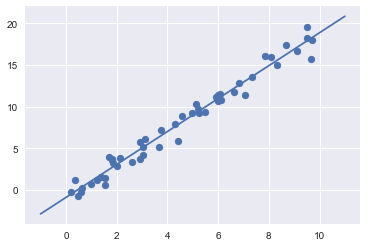

In [16]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

#### 监督学习示例：鸢尾花数据分类

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [19]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(ytest, y_model)

0.9736842105263158

#### 无监督学习示例：鸢尾花数据降维

In [22]:
from sklearn.decomposition import PCA

In [23]:
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

In [24]:
iris['PAC1'] = X_2D[:, 0]
iris['PAC2'] = X_2D[:, 1]

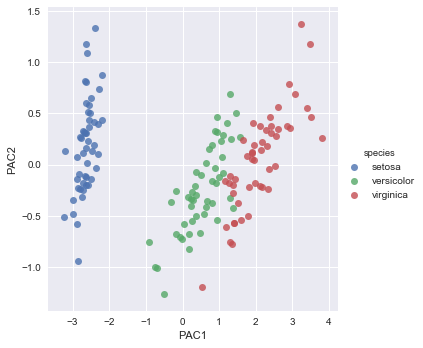

In [25]:
sns.lmplot('PAC1', 'PAC2', hue='species', data=iris, fit_reg=False)

#### 识别手写数字

In [26]:
from sklearn.datasets import load_digits

In [27]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

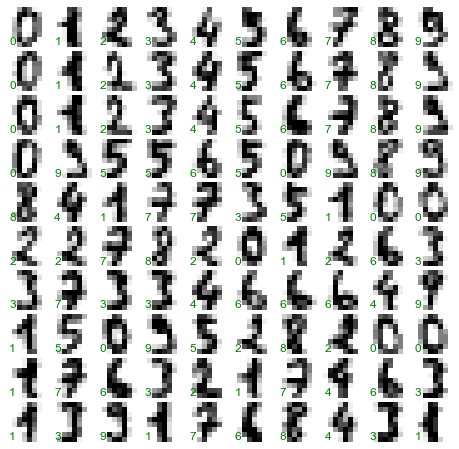

In [28]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [29]:
X  = digits.data
X.shape

(1797, 64)

In [30]:
y = digits.target
y.shape

(1797,)

In [31]:
from sklearn.manifold import Isomap

In [32]:
iso = Isomap(n_components=2)
iso.fit(X)
data_projected = iso.transform(X)

In [33]:
data_projected.shape

(1797, 2)

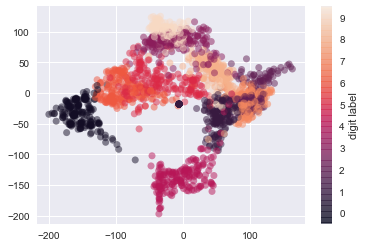

In [34]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c = digits.target, edgecolors='none', alpha=0.5)
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [35]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [36]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [37]:
accuracy_score(ytest, y_model)

0.8333333333333334

In [38]:
from sklearn.metrics import confusion_matrix

Text(92.68,0.5,'true value')

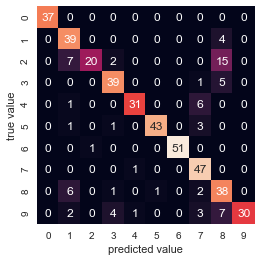

In [39]:
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

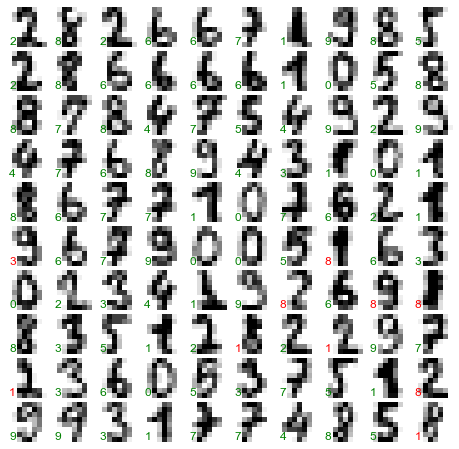

In [40]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

#### sklearn验证曲线

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [42]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [43]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

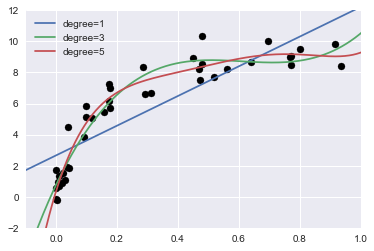

In [44]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

C:\Users\lilanqing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\lilanqing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


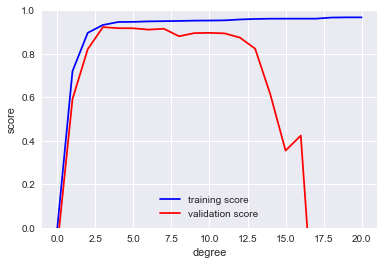

In [45]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');